# EDA - CVC-FP Dataset

In [3]:
from pathlib import Path
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

from utils.utils import load_yaml_config

cfg = load_yaml_config()
datasets_cfg = cfg["file_paths"]["datasets"]
DATASETS_DIR = datasets_cfg["root"]
datasets = Path(DATASETS_DIR)

cvc_fp = datasets / datasets_cfg["relative_paths"]["cvc_fp"]

assert cvc_fp.is_dir, f"Invalid directory: {cvc_fp}"
cvc_fp

PosixPath('/home/yunusskeete/Documents/data/2D/Floor Plans/CVC-FP/ImagesGT')

In [10]:
{f.suffix for f in cvc_fp.iterdir()}  # '' is a folder

{'.jpg', '.png', '.svg'}

In [41]:
def safe_int(value, default=None):
    try:
        return int(value)
    except (ValueError, TypeError):
        # Return a default value if conversion fails
        return default


safe_int("a")

In [49]:
from natsort import natsorted

# ds = sorted(f for f in cvc_fp.iterdir())
ds = natsorted(f for f in cvc_fp.iterdir())
# ds = natsorted(f for f in cvc_fp.iterdir() if safe_int(f.name[0]) is not None)
# ds = [f for f in cvc_fp.iterdir() if safe_int(f.name[0]) is not None]
# ds.reverse()
[f.name for idx, f in enumerate(ds) if idx < 5]

['1.png', '1_gt_14.svg', '2.png', '2_gt_16.svg', '3.png']

In [50]:
(
    sum(1 for _ in cvc_fp.glob("*") if _.is_file() and _.suffix == ".jpg"),
    sum(1 for _ in cvc_fp.glob("*") if _.is_file() and _.suffix == ".png"),
    sum(1 for _ in cvc_fp.glob("*") if _.is_file() and _.suffix == ".svg"),
)

(4, 119, 122)

## Visualisation

image_pair_idx: (0, 1)
image_pair: ('1.png', '1_gt_14.svg')


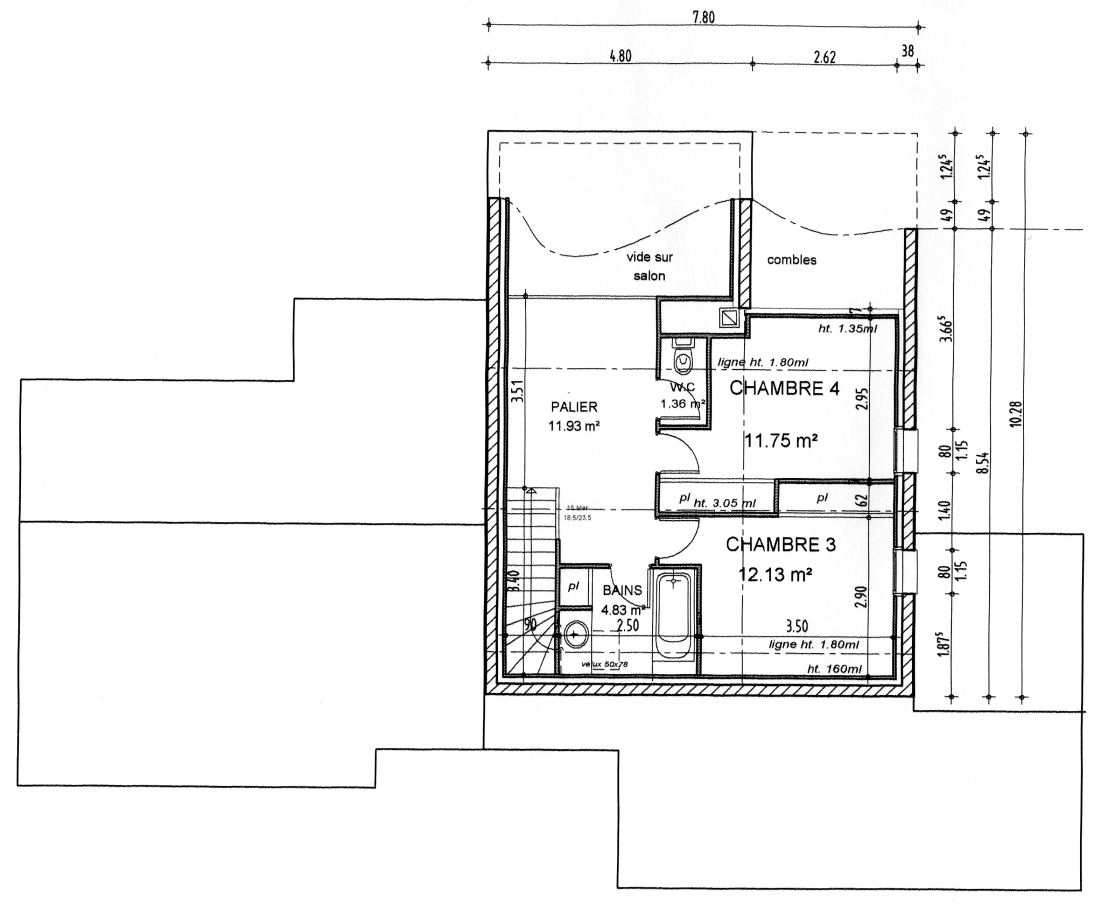

In [51]:
from PIL import Image

image_idx = 0

### Image
image_pair_idx = image_idx // 2, image_idx // 2 + 1
print(f"image_pair_idx: {image_pair_idx}")
png_image, svg_image = ds[image_pair_idx[0]], ds[image_pair_idx[1]]
print(f"image_pair: {png_image.name, svg_image.name}")

### Labels


### Visualisation
# PIL does not support SVG files
Image.open(png_image)

In [54]:
str(svg_image)

'/home/yunusskeete/Documents/data/2D/Floor Plans/CVC-FP/ImagesGT/1_gt_14.svg'

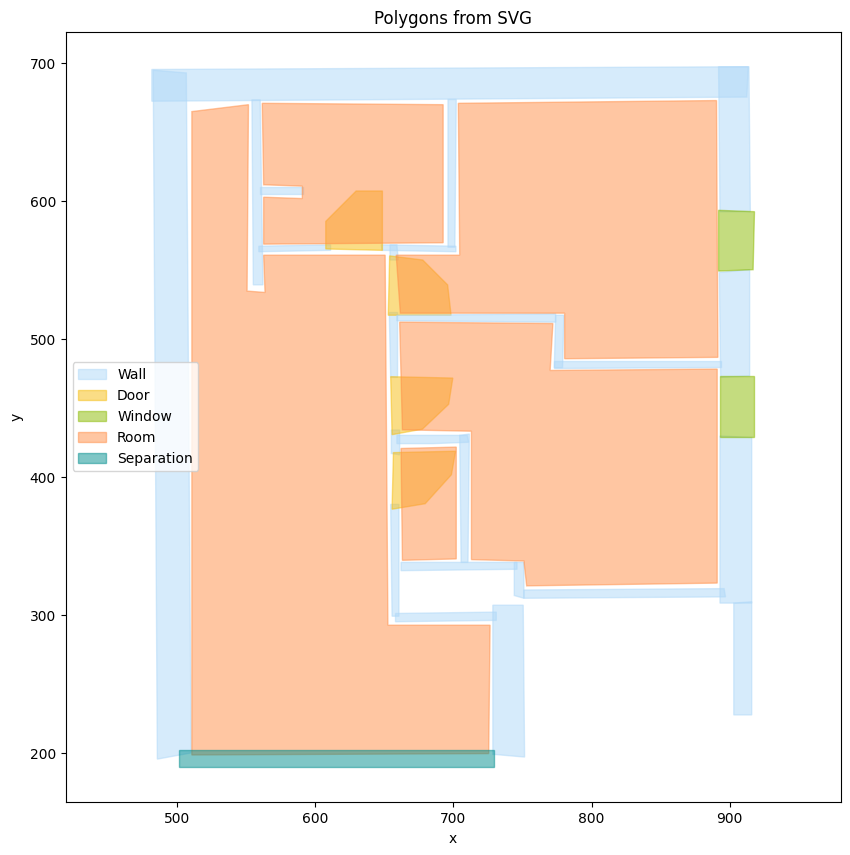

In [72]:
import svgpathtools as spt
import matplotlib.pyplot as plt

# Load the SVG file
svg_file = str(svg_image)
paths, attributes, _ = spt.svg2paths2(svg_file)

# Define a mapping of class labels to specific colours
class_to_colour = {
    "Door": "#F6BD0F",  # Yellow
    "Wall": "#AFD8F8",  # Light blue
    "Window": "#8BBA00",  # Green
    "Room": "#FF8E46",  # Orange
    "Separation": "#008E8E",  # Teal
    "Unknown": "#000000",  # Black
    # Add other class-colour mappings as needed
}

# Initialize the plot
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Store seen classes to avoid duplicate legends
seen_classes = set()

# Iterate through the extracted paths to find polygons
for path, attr in zip(paths, attributes):
    if "points" in attr:
        points_str = attr["points"]

        if points_str:
            # Convert points from string to list of tuples, ignoring empty entries
            points = [
                tuple(map(float, point.split(",")))
                for point in points_str.split(" ")
                if point
            ]

            if points:
                # Separate x and y coordinates for plotting
                x, y = zip(*points)

                # Get the class label from the 'class' attribute
                class_label = attr.get("class", "Unknown")

                # Use the specified colour from the mapping
                colour = class_to_colour.get(
                    class_label, class_to_colour["Unknown"]
                )  # Default to gray if not found

                # Only add label to the first occurrence to avoid duplicate legend entries
                if class_label not in seen_classes:
                    ax.fill(x, y, label=class_label, color=colour, alpha=0.5)
                    seen_classes.add(class_label)  # Mark this class as seen
                else:
                    # Plot without a label if it's already seen
                    ax.fill(x, y, color=colour, alpha=0.5)

# Set plot settings
ax.set_title("Polygons from SVG")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("equal")
ax.legend()
plt.show()